# High speed code

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext cython

In [2]:
import numba
import cython

In [3]:
def julia_fractal_python(N,l,c,canvas):
    for m in range(N):
        for n in range(N):
            z=-l+2*l/(N-1)*m + 1j*(-l+2*l/(N-1)*n)
            for t in range(256):
                z=z**2+c
                if z.real**2+z.imag**2 > 4.0:
                    canvas[m,n]=t
                    break

In [4]:
N=2048
l=1.5
c=-0.70176-0.3842j
canvas=np.zeros((N,N),dtype='int64')
julia_fractal_python(N,l,c,canvas)

1 loop, best of 3: 28.1 s per loop


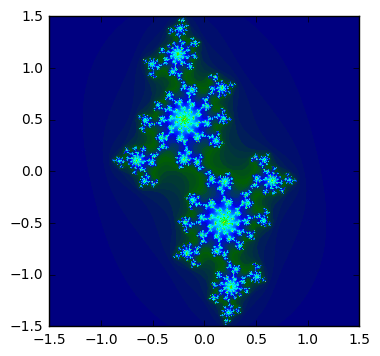

In [5]:
fig,ax=plt.subplots()
ax.imshow(canvas,cmap=plt.cm.gist_ncar,extent=[-l,l,-l,l])

In [6]:
julia_fractal_numba=numba.jit(nopython=True)(julia_fractal_python)

In [11]:
%timeit julia_fractal_numba(N,l,c,canvas)

10 loops, best of 3: 159 ms per loop


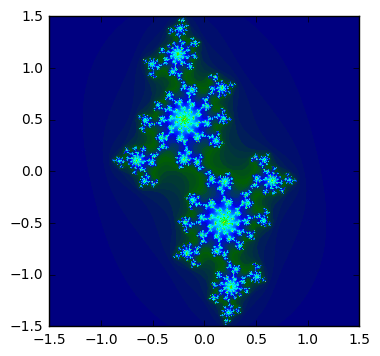

In [8]:
fig,ax=plt.subplots()
ax.imshow(canvas,cmap=plt.cm.gist_ncar,extent=[-l,l,-l,l])

In [9]:
%%cython -a
cimport numpy
cimport cython
@cython.boundscheck(False)
@cython.wraparound(False)
def julia_fractal_cython(int N,int l,complex c,numpy.ndarray[numpy.int64_t,ndim=2] canvas):
    cdef int m,n,t
    cdef double complex z
    for m in range(N):
        for n in range(N):
            z=-l+2*l/(N-1)*m + 1j*(-l+2*l/(N-1)*n)
            for t in range(256):
                z=z**2+c
                if z.real**2+z.imag**2 > 4.0:
                    canvas[m,n]=t
                    break

In [12]:
%timeit julia_fractal_cython(N,l,c,canvas)

10 loops, best of 3: 60.2 ms per loop
